In [1]:
import os
import cx_Oracle
import pandas as pd
import numpy as np
import pickle
from datetime import date,datetime
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_val_score 
import time
import matplotlib.pyplot as plt
from sklearn.utils import resample
import datetime
import sys
sys.path.append(R'C:\Users\aman.khatri91425\Desktop\HomeCredit\Bigdata\Scoring Worlflow')

In [2]:
os.chdir(r"C:\Users\aman.khatri91425\Desktop\HomeCredit\UW\RSS")

# Read Data File

In [3]:
df=pd.read_csv(os.getcwd()+r"\Data Files\export_concatenated.csv")

In [4]:
df = df[(df["SOURCE_ID"]=="CIBIL")&(df["CLIENT_EXI_3M"]=="N")]

# WOE Analysis(Selected Variables)

In [5]:
df.columns

Index(['Unnamed: 0', 'SKP_CREDIT_CASE', 'TIME_DECISION_DATE', 'CLIENT_EXI_3M',
       'RISK_FPD30', 'RISK_FSTQPD30', 'RISK_FSTQPD60', 'SOURCE_ID',
       'ADDRESS_CNT', 'ZIPCODE_CNT', 'ZIPCODE_ADDRESS_RAT',
       'RESIDENCE_ADDRESS_CNT', 'RESIDENCE_ZIPCODE_CNT',
       'RESIDENCE_ZIPCODE_ADDRESS_RAT', 'RESIDENCE_ADDRESS_PCT',
       'OFFICE_ADDRESS_CNT', 'OFFICE_ZIPCODE_CNT',
       'OFFICE_ZIPCODE_ADDRESS_RAT', 'OFFICE_ADDRESS_PCT',
       'PERMANENT_ADDRESS_CNT', 'PERMANENT_ZIPCODE_CNT',
       'PERMANENT_ZIPCODE_ADDRESS_RAT', 'PERMANENT_ADDRESS_PCT',
       'PERMANENT_OFFICE_COMB_RAT', 'RESIDENT_OFFICE_COMB_RAT',
       'PERMANENT_RESIDENCE_COMB_RAT', 'RISK_SCORE'],
      dtype='object')

In [6]:
df_train = df

In [7]:
cols_pred_cat=[]
cols_pred_num = ['ZIPCODE_ADDRESS_RAT',
  'OFFICE_ADDRESS_PCT',
  'RESIDENCE_ADDRESS_CNT',
  'RESIDENCE_ZIPCODE_ADDRESS_RAT',
  'PERMANENT_ZIPCODE_ADDRESS_RAT',
  'PERMANENT_ADDRESS_PCT',
  'ADDRESS_CNT','RISK_SCORE']

In [8]:
from scoring.grouping import Grouping

grouping = Grouping(columns = sorted(cols_pred_num),
                    cat_columns = sorted(cols_pred_cat),
                    group_count=3, 
                    min_samples=10000)

grouping.fit(df_train[cols_pred_num],
             df_train["RISK_FSTQPD60"],
          #   w=data[train_mask][col_weight],
            progress_bar=True, category_limit=10000);

grouping.save(r"C:\Users\aman.khatri91425\Desktop\HomeCredit\Bigdata\Common Maps KNN\my_grouping")

data_woe = grouping.transform(df, transform_to='woe', progress_bar=True)

'Grouping saved on 2020-11-03 17:08:29 to file C:\\Users\\aman.khatri91425\\Desktop\\HomeCredit\\Bigdata\\Common Maps KNN\\my_grouping'

### Plot Bins

***

### ADDRESS_CNT

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_ADDRESS_CNT,,,,,,,,
"[-inf, 1.5)",635587.0,21973.0,0.0346,0.6088,0.6524,0.0673,0.0692,0.6508
"[1.5, 3.5)",238944.0,9672.0,0.0405,0.2680,0.2438,-0.0924,-0.0947,0.2447
"[3.5, inf)",102113.0,4447.0,0.0435,0.1232,0.1038,-0.1671,-0.1711,0.1046
nan,0.0,0.0,NaN,0.0000,0.0000,NaN,-3.2604,0.0000


IV: 0.0086
Gini: 4.58


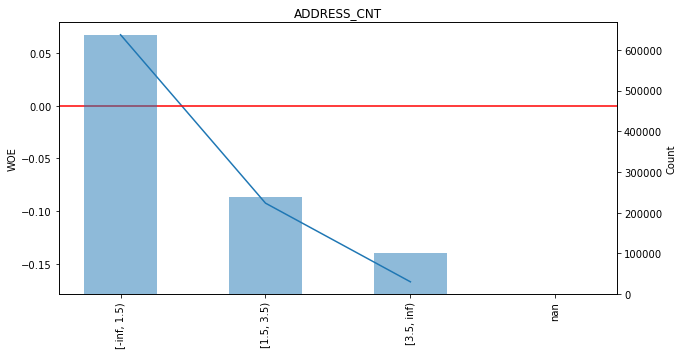

***

### OFFICE_ADDRESS_PCT

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_OFFICE_ADDRESS_PCT,,,,,,,,
"[-inf, 0.125)",797108.0,28574.0,0.0358,0.7917,0.8171,0.0308,0.0316,0.8162
"[0.125, 0.5834)",155142.0,6590.0,0.0425,0.1826,0.1579,-0.1416,-0.1450,0.1589
"[0.5834, inf)",24394.0,928.0,0.0380,0.0257,0.0249,-0.0294,-0.0301,0.0250
nan,0.0,0.0,NaN,0.0000,0.0000,NaN,-3.2604,0.0000


IV: 0.0044
Gini: 2.59


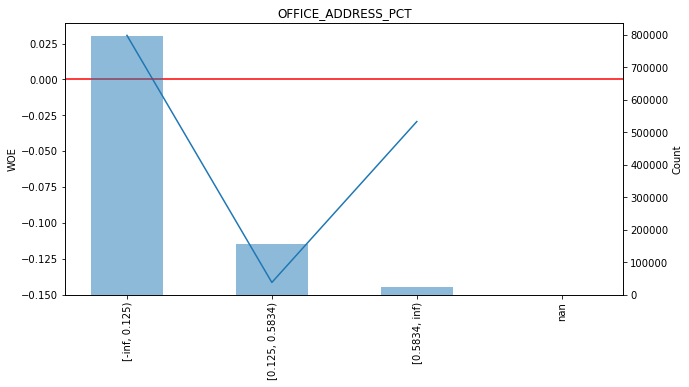

***

### PERMANENT_ADDRESS_PCT

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_PERMANENT_ADDRESS_PCT,,,,,,,,
"[-inf, 0.125)",802641.0,28015.0,0.0349,0.7762,0.8236,0.0577,0.0592,0.8218
"[0.125, 0.2916)",33967.0,1677.0,0.0494,0.0465,0.0343,-0.2960,-0.3026,0.0348
"[0.2916, inf)",140036.0,6400.0,0.0457,0.1773,0.1421,-0.2165,-0.2216,0.1434
nan,0.0,0.0,NaN,0.0000,0.0000,NaN,-3.2604,0.0000


IV: 0.0143
Gini: 4.79


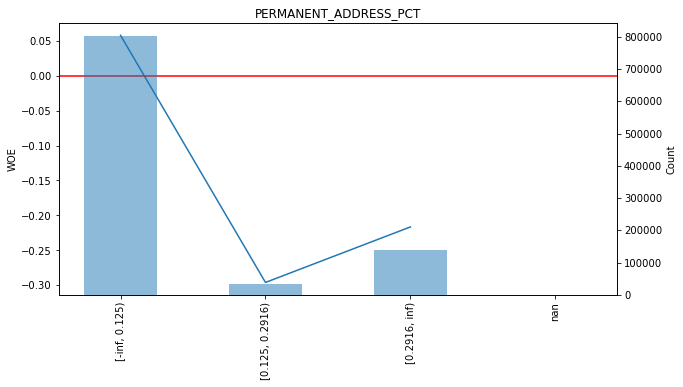

***

### PERMANENT_ZIPCODE_ADDRESS_RAT

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_PERMANENT_ZIPCODE_ADDRESS_RAT,,,,,,,,
"[-inf, 0.7084)",16419.0,849.0,0.0517,0.0235,0.0166,-0.3438,-0.3514,0.0168
"[0.7084, inf)",157584.0,7228.0,0.0459,0.2003,0.1599,-0.2202,-0.2254,0.1614
nan,802641.0,28015.0,0.0349,0.7762,0.8236,0.0577,0.0592,0.8218


IV: 0.0144
Gini: 4.78


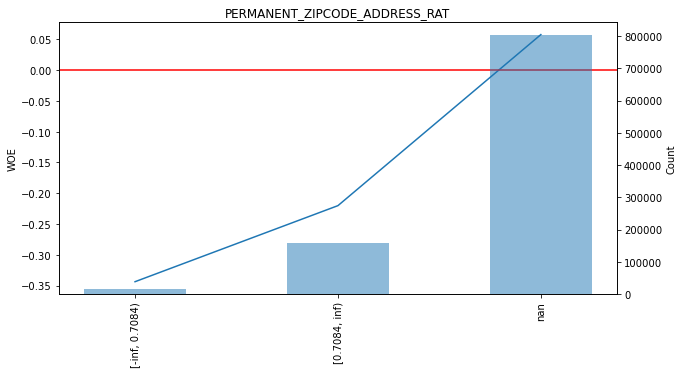

***

### RESIDENCE_ADDRESS_CNT

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_RESIDENCE_ADDRESS_CNT,,,,,,,,
"[-inf, 0.5)",151299.0,6077.0,0.0402,0.1684,0.1544,-0.0845,-0.0866,0.1549
"[0.5, 1.5)",728426.0,25765.0,0.0354,0.7139,0.7471,0.0443,0.0455,0.7458
"[1.5, inf)",96919.0,4250.0,0.0439,0.1178,0.0985,-0.1741,-0.1783,0.0992
nan,0.0,0.0,NaN,0.0000,0.0000,NaN,-3.2604,0.0000


IV: 0.0061
Gini: 3.48


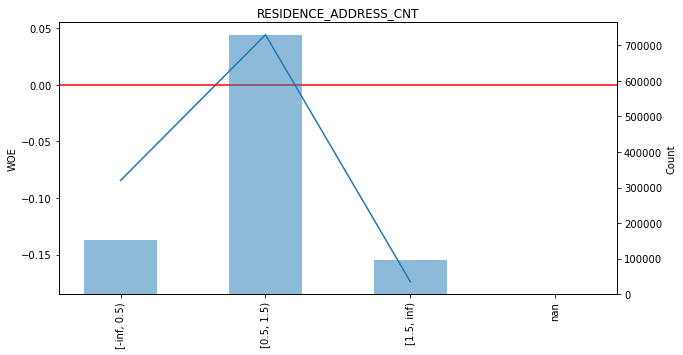

***

### RESIDENCE_ZIPCODE_ADDRESS_RAT

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_RESIDENCE_ZIPCODE_ADDRESS_RAT,,,,,,,,
"[-inf, 0.875)",59913.0,2671.0,0.0446,0.0740,0.0609,-0.1910,-0.1956,0.0613
"[0.875, inf)",765432.0,27344.0,0.0357,0.7576,0.7847,0.0343,0.0352,0.7837
nan,151299.0,6077.0,0.0402,0.1684,0.1544,-0.0845,-0.0866,0.1549


IV: 0.0047
Gini: 2.83


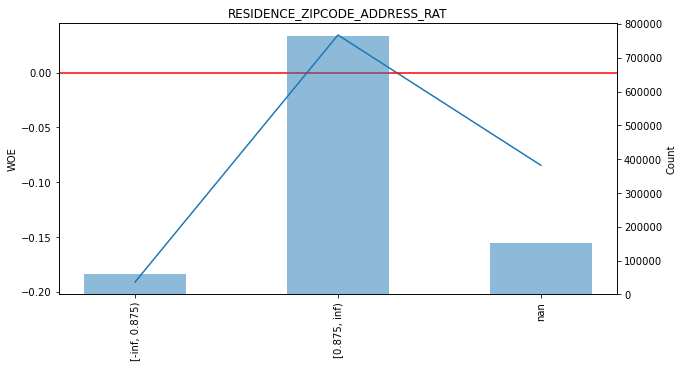

***

### RISK_SCORE

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_RISK_SCORE,,,,,,,,
"[-inf, 0.01008)",640705.0,14764.0,0.0230,0.4091,0.6655,0.4709,0.4867,0.656
"[0.01008, 0.02011)",280269.0,16109.0,0.0575,0.4463,0.2809,-0.4537,-0.4632,0.287
"[0.02011, inf)",55670.0,5219.0,0.0937,0.1446,0.0536,-0.9755,-0.9917,0.057
nan,0.0,0.0,NaN,0.0000,0.0000,NaN,-3.2604,0.000


IV: 0.2917
Gini: 27.31


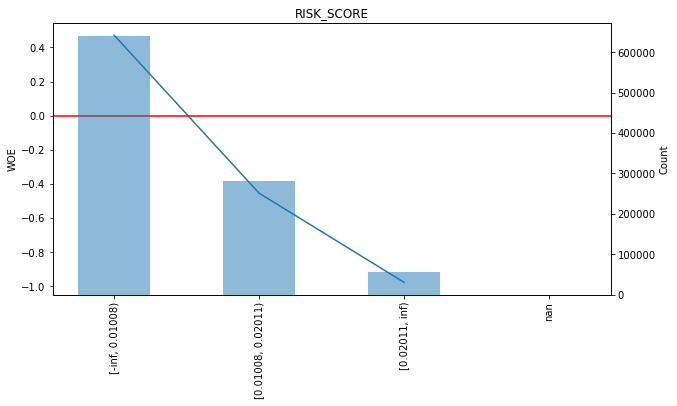

***

### ZIPCODE_ADDRESS_RAT

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_ZIPCODE_ADDRESS_RAT,,,,,,,,
"[-inf, 0.4166)",55286.0,2504.0,0.0453,0.0694,0.0561,-0.2072,-0.2121,0.0566
"[0.4166, 0.875)",198710.0,8317.0,0.0419,0.2304,0.2024,-0.1265,-0.1296,0.2035
"[0.875, inf)",722648.0,25271.0,0.0350,0.7002,0.7415,0.0558,0.0573,0.7399
nan,0.0,0.0,NaN,0.0000,0.0000,NaN,-3.2604,0.0000


IV: 0.0088
Gini: 4.24


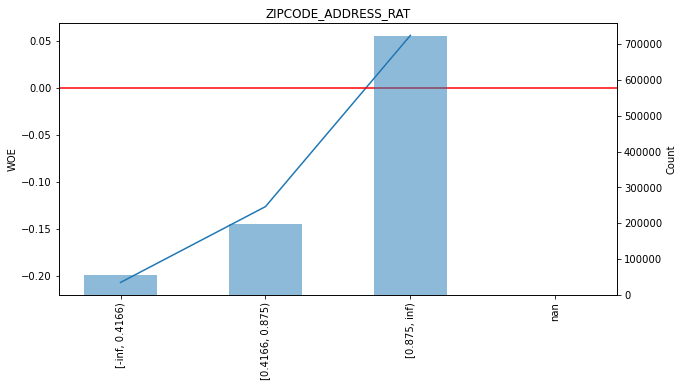

In [9]:
grouping.plot_bins(data=df_train, cols_pred_num=cols_pred_num, cols_pred_cat=cols_pred_cat,
                    mask = pd.Series(df_train["RISK_FSTQPD60"]>=0),col_target="RISK_FSTQPD60", 
                   output_folder=r"C:\Users\aman.khatri91425\Desktop\HomeCredit\Bigdata\Common Maps KNN", col_weight=None)

# WOE Analysis(All Variables)

In [10]:
df_train = df

In [11]:
cols_pred_cat=[]
cols_pred_num = ['ADDRESS_CNT', 'ZIPCODE_CNT', 'ZIPCODE_ADDRESS_RAT',
       'RESIDENCE_ADDRESS_CNT', 'RESIDENCE_ZIPCODE_CNT',
       'RESIDENCE_ZIPCODE_ADDRESS_RAT', 'RESIDENCE_ADDRESS_PCT',
       'OFFICE_ADDRESS_CNT', 'OFFICE_ZIPCODE_CNT',
       'OFFICE_ZIPCODE_ADDRESS_RAT', 'OFFICE_ADDRESS_PCT',
       'PERMANENT_ADDRESS_CNT', 'PERMANENT_ZIPCODE_CNT',
       'PERMANENT_ZIPCODE_ADDRESS_RAT', 'PERMANENT_ADDRESS_PCT',
       'PERMANENT_OFFICE_COMB_RAT', 'RESIDENT_OFFICE_COMB_RAT',
       'PERMANENT_RESIDENCE_COMB_RAT','RISK_SCORE']

In [12]:
from scoring.grouping import Grouping

grouping = Grouping(columns = sorted(cols_pred_num),
                    cat_columns = sorted(cols_pred_cat),
                    group_count=3, 
                    min_samples=10000)

grouping.fit(df_train[cols_pred_num],
             df_train["RISK_FSTQPD60"],
          #   w=data[train_mask][col_weight],
            progress_bar=True, category_limit=10000);

grouping.save(r"C:\Users\aman.khatri91425\Desktop\HomeCredit\Bigdata\Common Maps KNN\my_grouping")

data_woe = grouping.transform(df, transform_to='woe', progress_bar=True)

'Grouping saved on 2020-11-03 17:10:06 to file C:\\Users\\aman.khatri91425\\Desktop\\HomeCredit\\Bigdata\\Common Maps KNN\\my_grouping'

### Plot Bins

***

### ADDRESS_CNT

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_ADDRESS_CNT,,,,,,,,
"[-inf, 1.5)",635587.0,21973.0,0.0346,0.6088,0.6524,0.0673,0.0692,0.6508
"[1.5, 3.5)",238944.0,9672.0,0.0405,0.2680,0.2438,-0.0924,-0.0947,0.2447
"[3.5, inf)",102113.0,4447.0,0.0435,0.1232,0.1038,-0.1671,-0.1711,0.1046
nan,0.0,0.0,NaN,0.0000,0.0000,NaN,-3.2604,0.0000


IV: 0.0086
Gini: 4.58


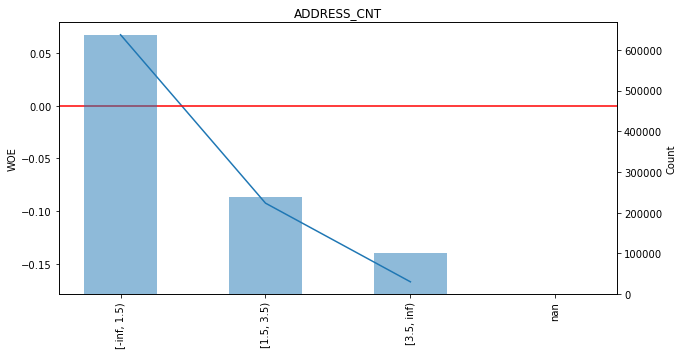

***

### OFFICE_ADDRESS_CNT

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_OFFICE_ADDRESS_CNT,,,,,,,,
"[-inf, 0.5)",797108.0,28574.0,0.0358,0.7917,0.8171,0.0308,0.0316,0.8162
"[0.5, 1.5)",138985.0,5801.0,0.0417,0.1607,0.1416,-0.1237,-0.1267,0.1423
"[1.5, inf)",40551.0,1717.0,0.0423,0.0476,0.0413,-0.1383,-0.1417,0.0415
nan,0.0,0.0,NaN,0.0000,0.0000,NaN,-3.2604,0.0000


IV: 0.0041
Gini: 2.55


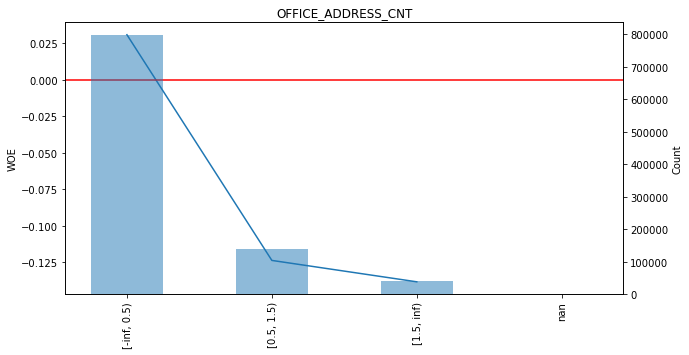

***

### OFFICE_ADDRESS_PCT

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_OFFICE_ADDRESS_PCT,,,,,,,,
"[-inf, 0.125)",797108.0,28574.0,0.0358,0.7917,0.8171,0.0308,0.0316,0.8162
"[0.125, 0.5834)",155142.0,6590.0,0.0425,0.1826,0.1579,-0.1416,-0.1450,0.1589
"[0.5834, inf)",24394.0,928.0,0.0380,0.0257,0.0249,-0.0294,-0.0301,0.0250
nan,0.0,0.0,NaN,0.0000,0.0000,NaN,-3.2604,0.0000


IV: 0.0044
Gini: 2.59


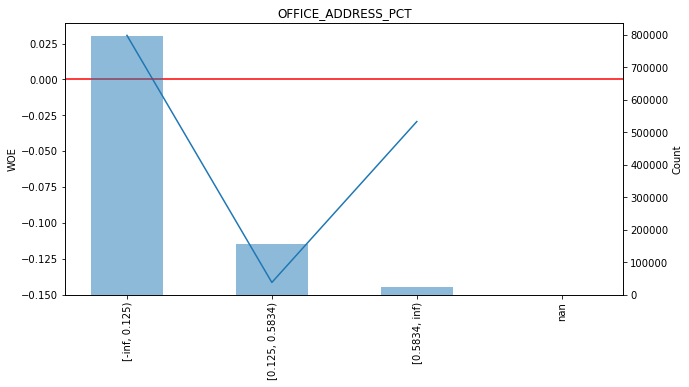

***

### OFFICE_ZIPCODE_ADDRESS_RAT

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_OFFICE_ZIPCODE_ADDRESS_RAT,,,,,,,,
"[-inf, 0.7084)",21201.0,849.0,0.0400,0.0235,0.0216,-0.0815,-0.0835,0.0217
"[0.7084, inf)",158335.0,6669.0,0.0421,0.1848,0.1613,-0.1329,-0.1362,0.1621
nan,797108.0,28574.0,0.0358,0.7917,0.8171,0.0308,0.0316,0.8162


IV: 0.0042
Gini: 2.56


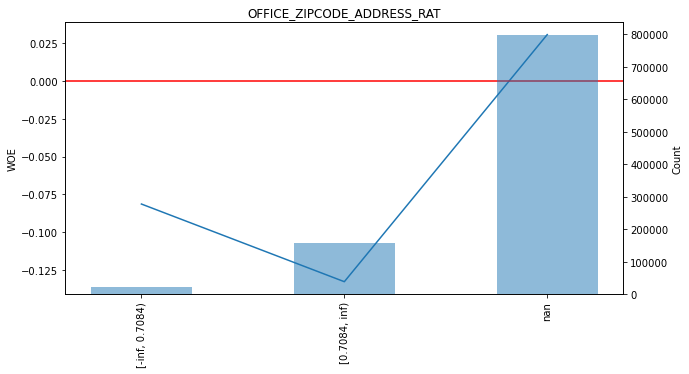

***

### OFFICE_ZIPCODE_CNT

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_OFFICE_ZIPCODE_CNT,,,,,,,,
"[-inf, 0.5)",797156.0,28576.0,0.0358,0.7918,0.8172,0.0308,0.0316,0.8162
"[0.5, 1.5)",156970.0,6527.0,0.0416,0.1808,0.1600,-0.1198,-0.1228,0.1607
"[1.5, inf)",22518.0,989.0,0.0439,0.0274,0.0229,-0.1757,-0.1799,0.0231
nan,0.0,0.0,NaN,0.0000,0.0000,NaN,-3.2604,0.0000


IV: 0.0042
Gini: 2.56


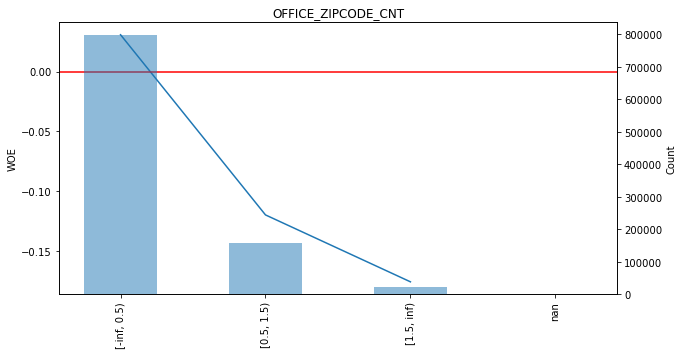

***

### PERMANENT_ADDRESS_CNT

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_PERMANENT_ADDRESS_CNT,,,,,,,,
"[-inf, 0.5)",802641.0,28015.0,0.0349,0.7762,0.8236,0.0577,0.0592,0.8218
"[0.5, 1.5)",149033.0,6833.0,0.0458,0.1893,0.1512,-0.2198,-0.2249,0.1526
"[1.5, inf)",24970.0,1244.0,0.0498,0.0345,0.0252,-0.3053,-0.3122,0.0256
nan,0.0,0.0,NaN,0.0000,0.0000,NaN,-3.2604,0.0000


IV: 0.0143
Gini: 4.78


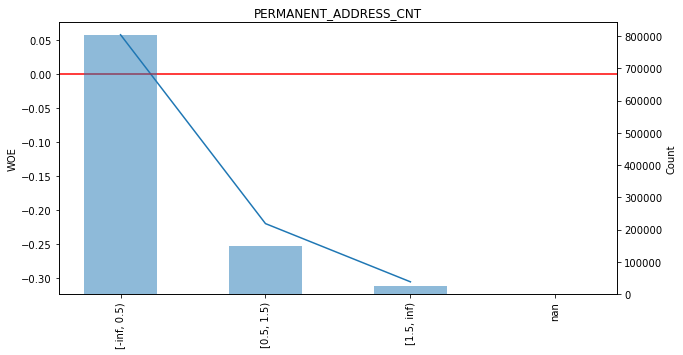

***

### PERMANENT_ADDRESS_PCT

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_PERMANENT_ADDRESS_PCT,,,,,,,,
"[-inf, 0.125)",802641.0,28015.0,0.0349,0.7762,0.8236,0.0577,0.0592,0.8218
"[0.125, 0.2916)",33967.0,1677.0,0.0494,0.0465,0.0343,-0.2960,-0.3026,0.0348
"[0.2916, inf)",140036.0,6400.0,0.0457,0.1773,0.1421,-0.2165,-0.2216,0.1434
nan,0.0,0.0,NaN,0.0000,0.0000,NaN,-3.2604,0.0000


IV: 0.0143
Gini: 4.79


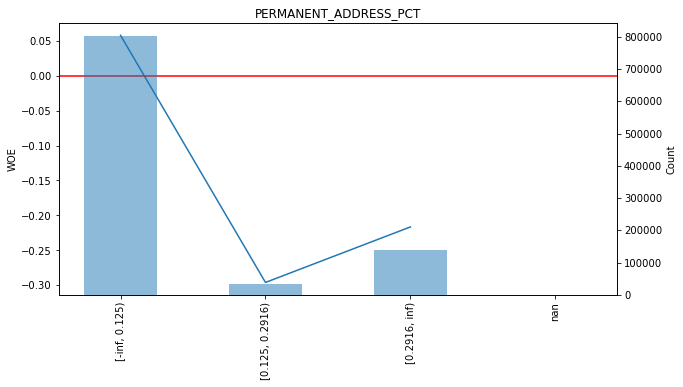

***

### PERMANENT_OFFICE_COMB_RAT

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_PERMANENT_OFFICE_COMB_RAT,,,,,,,,
"[-inf, 0.7084)",27400.0,1281.0,0.0468,0.0355,0.0278,-0.2398,-0.2454,0.0281
"[0.7084, inf)",269320.0,11658.0,0.0433,0.3230,0.2739,-0.1609,-0.1647,0.2758
nan,679924.0,23153.0,0.0341,0.6415,0.6983,0.0826,0.0848,0.6962


IV: 0.0148
Gini: 5.75


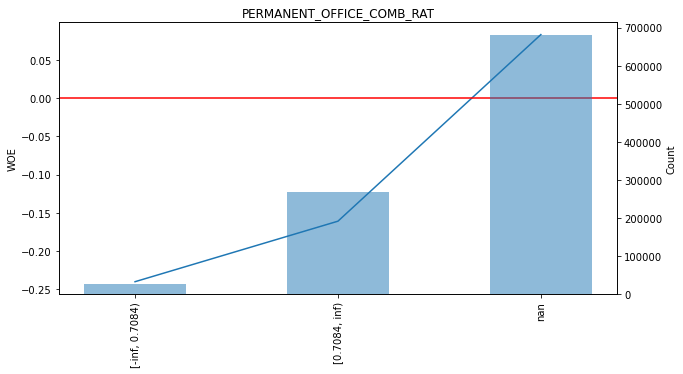

***

### PERMANENT_RESIDENCE_COMB_RAT

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_PERMANENT_RESIDENCE_COMB_RAT,,,,,,,,
"[-inf, 0.5834)",58749.0,2841.0,0.0484,0.0787,0.0594,-0.2746,-0.2808,0.0602
"[0.5834, 0.875)",14395.0,657.0,0.0456,0.0182,0.0146,-0.2151,-0.2202,0.0147
"[0.875, inf)",825243.0,29898.0,0.0362,0.8284,0.8456,0.0201,0.0206,0.8450
nan,78257.0,2696.0,0.0345,0.0747,0.0803,0.0709,0.0728,0.0801


IV: 0.0070
Gini: 2.63


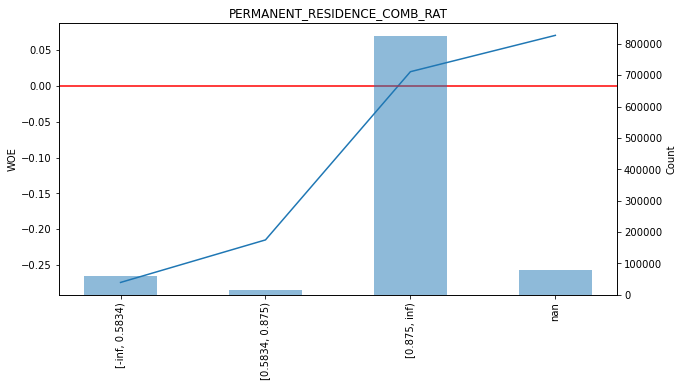

***

### PERMANENT_ZIPCODE_ADDRESS_RAT

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_PERMANENT_ZIPCODE_ADDRESS_RAT,,,,,,,,
"[-inf, 0.7084)",16419.0,849.0,0.0517,0.0235,0.0166,-0.3438,-0.3514,0.0168
"[0.7084, inf)",157584.0,7228.0,0.0459,0.2003,0.1599,-0.2202,-0.2254,0.1614
nan,802641.0,28015.0,0.0349,0.7762,0.8236,0.0577,0.0592,0.8218


IV: 0.0144
Gini: 4.78


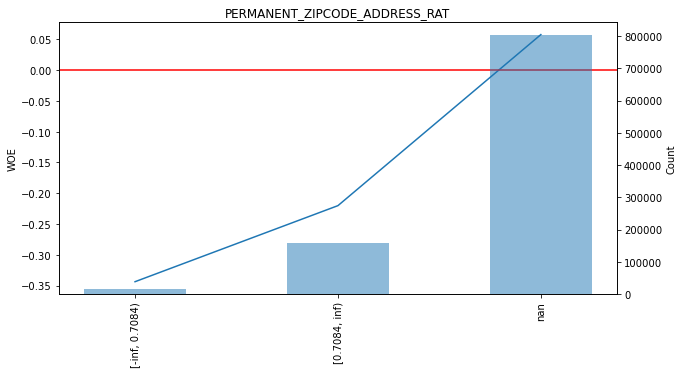

***

### PERMANENT_ZIPCODE_CNT

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_PERMANENT_ZIPCODE_CNT,,,,,,,,
"[-inf, 0.5)",802743.0,28016.0,0.0349,0.7762,0.8237,0.0578,0.0593,0.8219
"[0.5, inf)",173901.0,8076.0,0.0464,0.2238,0.1763,-0.2330,-0.2384,0.1781
nan,0.0,0.0,NaN,0.0000,0.0000,NaN,-3.2604,0.0000


IV: 0.0141
Gini: 4.75


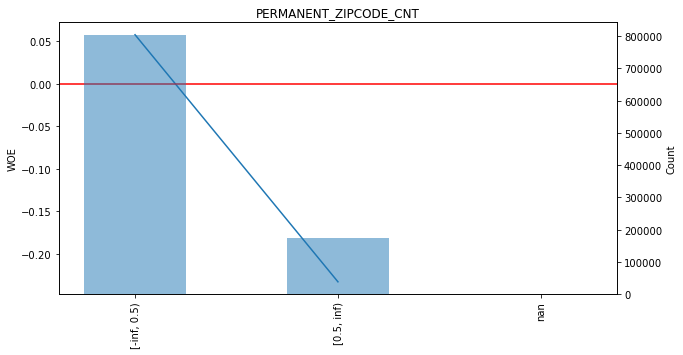

***

### RESIDENCE_ADDRESS_CNT

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_RESIDENCE_ADDRESS_CNT,,,,,,,,
"[-inf, 0.5)",151299.0,6077.0,0.0402,0.1684,0.1544,-0.0845,-0.0866,0.1549
"[0.5, 1.5)",728426.0,25765.0,0.0354,0.7139,0.7471,0.0443,0.0455,0.7458
"[1.5, inf)",96919.0,4250.0,0.0439,0.1178,0.0985,-0.1741,-0.1783,0.0992
nan,0.0,0.0,NaN,0.0000,0.0000,NaN,-3.2604,0.0000


IV: 0.0061
Gini: 3.48


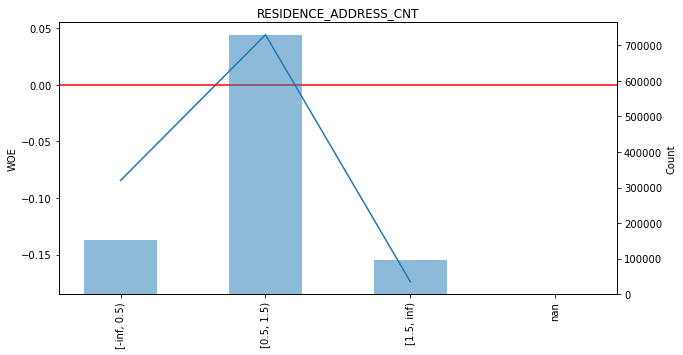

***

### RESIDENCE_ADDRESS_PCT

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_RESIDENCE_ADDRESS_PCT,,,,,,,,
"[-inf, 0.125)",151299.0,6077.0,0.0402,0.1684,0.1544,-0.0845,-0.0866,0.1549
"[0.125, 0.875)",243582.0,10290.0,0.0422,0.2851,0.2480,-0.1360,-0.1393,0.2494
"[0.875, inf)",581763.0,19725.0,0.0339,0.5465,0.5976,0.0869,0.0893,0.5957
nan,0.0,0.0,NaN,0.0000,0.0000,NaN,-3.2604,0.0000


IV: 0.0109
Gini: 5.33


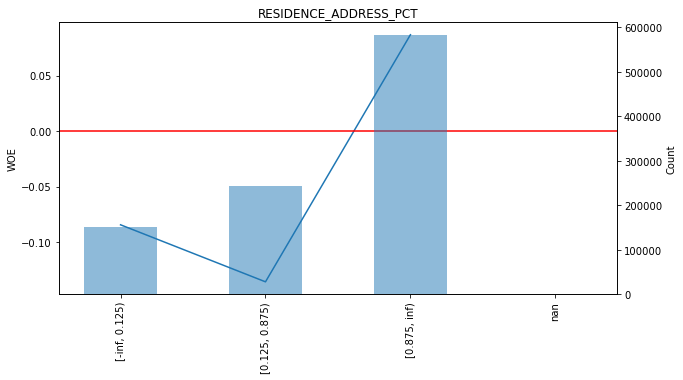

***

### RESIDENCE_ZIPCODE_ADDRESS_RAT

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_RESIDENCE_ZIPCODE_ADDRESS_RAT,,,,,,,,
"[-inf, 0.875)",59913.0,2671.0,0.0446,0.0740,0.0609,-0.1910,-0.1956,0.0613
"[0.875, inf)",765432.0,27344.0,0.0357,0.7576,0.7847,0.0343,0.0352,0.7837
nan,151299.0,6077.0,0.0402,0.1684,0.1544,-0.0845,-0.0866,0.1549


IV: 0.0047
Gini: 2.83


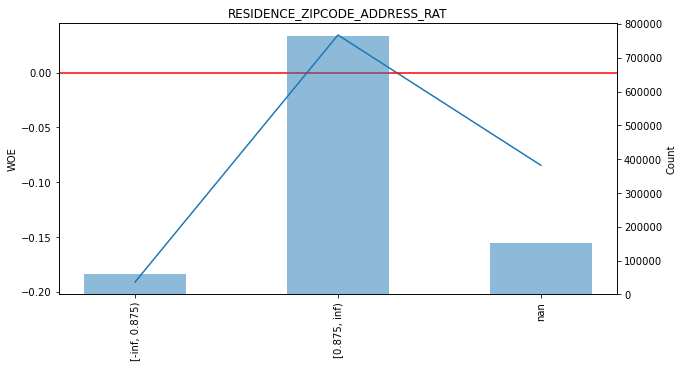

***

### RESIDENCE_ZIPCODE_CNT

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_RESIDENCE_ZIPCODE_CNT,,,,,,,,
"[-inf, 0.5)",151311.0,6077.0,0.0402,0.1684,0.1544,-0.0845,-0.0866,0.1549
"[0.5, 1.5)",780532.0,28101.0,0.0360,0.7786,0.8000,0.0264,0.0271,0.7992
"[1.5, inf)",44801.0,1914.0,0.0427,0.0530,0.0456,-0.1475,-0.1510,0.0459
nan,0.0,0.0,NaN,0.0000,0.0000,NaN,-3.2604,0.0000


IV: 0.0029
Gini: 2.19


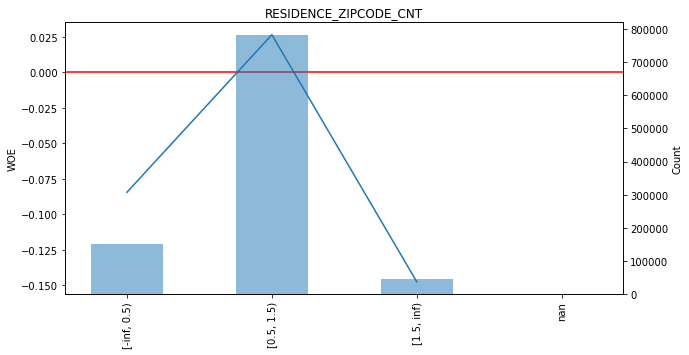

***

### RESIDENT_OFFICE_COMB_RAT

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_RESIDENT_OFFICE_COMB_RAT,,,,,,,,
"[-inf, 0.5834)",58811.0,2576.0,0.0438,0.0714,0.0598,-0.1730,-0.1771,0.0602
"[0.5834, 0.875)",17837.0,790.0,0.0443,0.0219,0.0181,-0.1843,-0.1887,0.0183
"[0.875, inf)",782591.0,27961.0,0.0357,0.7747,0.8023,0.0341,0.0350,0.8013
nan,117405.0,4765.0,0.0406,0.1320,0.1198,-0.0951,-0.0975,0.1202


IV: 0.0049
Gini: 2.85


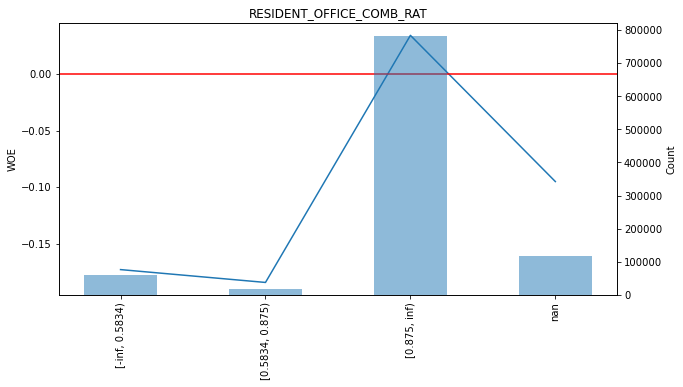

***

### RISK_SCORE

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_RISK_SCORE,,,,,,,,
"[-inf, 0.01008)",640705.0,14764.0,0.0230,0.4091,0.6655,0.4709,0.4867,0.656
"[0.01008, 0.02011)",280269.0,16109.0,0.0575,0.4463,0.2809,-0.4537,-0.4632,0.287
"[0.02011, inf)",55670.0,5219.0,0.0937,0.1446,0.0536,-0.9755,-0.9917,0.057
nan,0.0,0.0,NaN,0.0000,0.0000,NaN,-3.2604,0.000


IV: 0.2917
Gini: 27.31


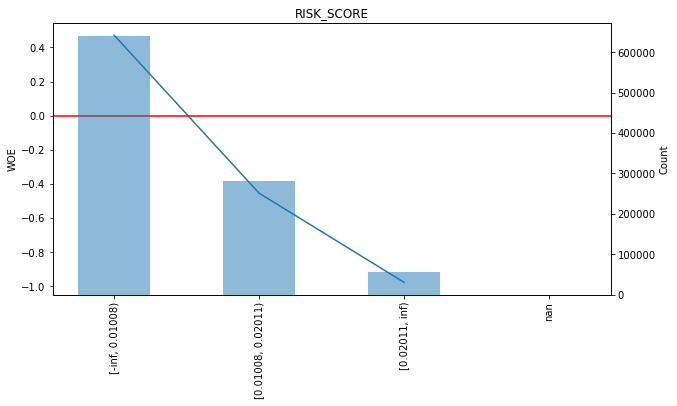

***

### ZIPCODE_ADDRESS_RAT

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_ZIPCODE_ADDRESS_RAT,,,,,,,,
"[-inf, 0.4166)",55286.0,2504.0,0.0453,0.0694,0.0561,-0.2072,-0.2121,0.0566
"[0.4166, 0.875)",198710.0,8317.0,0.0419,0.2304,0.2024,-0.1265,-0.1296,0.2035
"[0.875, inf)",722648.0,25271.0,0.0350,0.7002,0.7415,0.0558,0.0573,0.7399
nan,0.0,0.0,NaN,0.0000,0.0000,NaN,-3.2604,0.0000


IV: 0.0088
Gini: 4.24


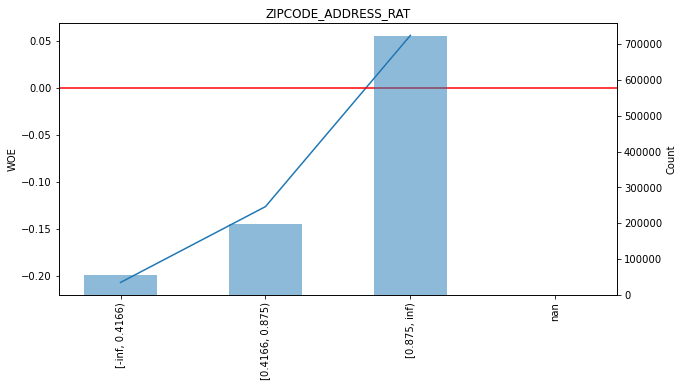

***

### ZIPCODE_CNT

,CNT_TOTAL,CNT_DEF,DEF_RATE,DIST_BAD,DIST_GOOD,WOE,WOE_check,SHARE
BIN_ZIPCODE_CNT,,,,,,,,
"[-inf, 1.5)",776921.0,28082.0,0.0361,0.7781,0.7962,0.0224,0.0230,0.7955
"[1.5, 2.5)",144954.0,5786.0,0.0399,0.1603,0.1480,-0.0782,-0.0802,0.1484
"[2.5, inf)",54769.0,2224.0,0.0406,0.0616,0.0559,-0.0957,-0.0980,0.0561
nan,0.0,0.0,NaN,0.0000,0.0000,NaN,-3.2604,0.0000


IV: 0.0020
Gini: 1.83


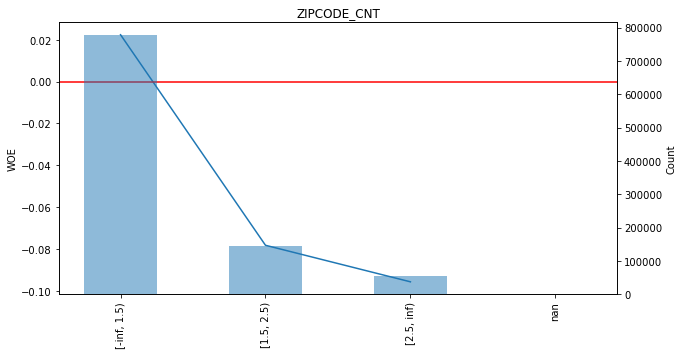

In [13]:
grouping.plot_bins(data=df_train, cols_pred_num=cols_pred_num, cols_pred_cat=cols_pred_cat,
                    mask = pd.Series(df_train["RISK_FSTQPD60"]>=0),col_target="RISK_FSTQPD60", 
                   output_folder=r"C:\Users\aman.khatri91425\Desktop\HomeCredit\Bigdata\Common Maps KNN", col_weight=None)